In [1]:
import numpy as np
import utils
import plotting_tools as pt

In [28]:
Nx = 150
Ny = 150
et = 1E6
N = 1
base_fn = 'output_swe'
pydir = '../%s/' %base_fn

tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
tags = tc.get_tag_dict()

In [29]:
1E3

1000.0

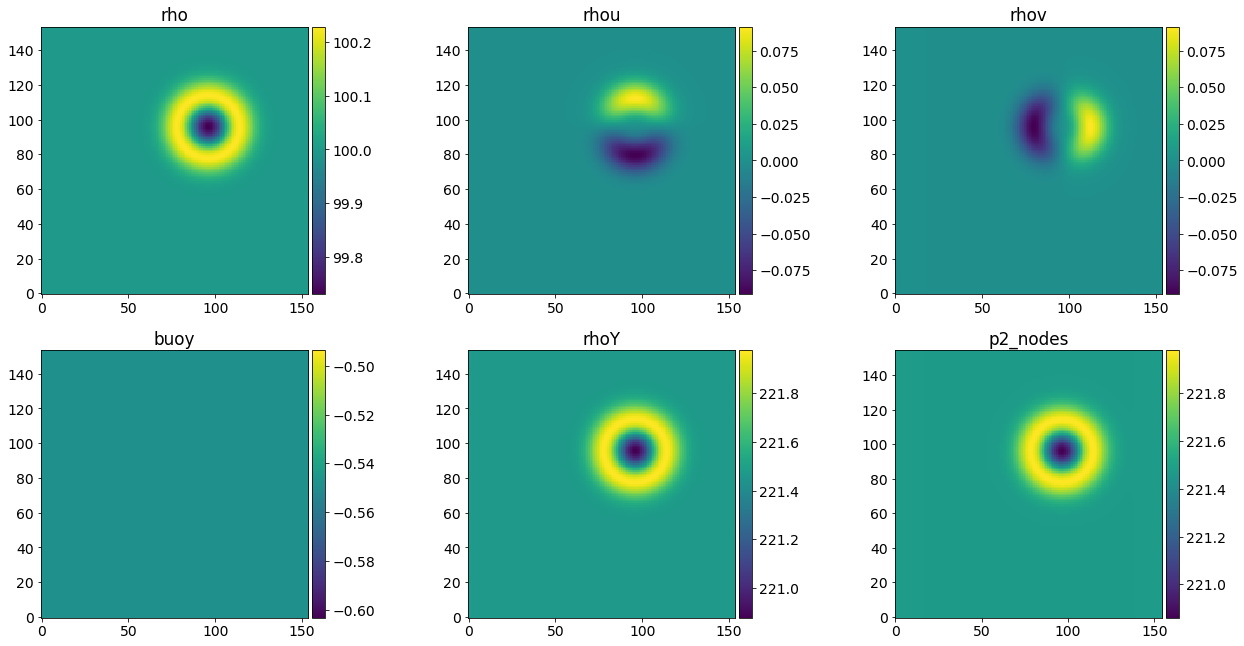

In [32]:
# comp_sfx = 'comp_last_working_ic0'
# H = 'optimal'
# comp_sfx = 'comp_H=%s' %str(H)
comp_sfx = 'comp'
# comp_sfx = 'icshear'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)
tag = tags[9]
# tag = 'ic'

idx = [95,95]
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
# attributes = ['rho','rhoY','Y']
# attributes = ['rho']
times = [50, 100]#, 150, 200]#, 250, 300]
times = [30]

H = 100.0

arr_lst = []
for time in times:
    for attribute in attributes:
        arr = tc.get_arr(path, time, N, attribute, label_type='WINDOW_STEP', tag=tag, inner=False, avg=False)[0]

        if attribute == 'rho':
#             arr -= H
            rho = np.copy(arr)
    
        if attribute == 'rhou' or attribute == 'rhov':
            arr /= rho

        if attribute == 'rhoY':
            rhoY = np.copy(arr)
        arr_lst.append([arr,attribute])

#     Y = rhoY / (rho+1.0)
#     arr_lst.append([rho - H, 'rho, time-step=%i' %time])
pl = pt.plotter(arr_lst,ncols=3,figsize=(18,10))
_ = pl.plot(aspect='equal',method='imshow')


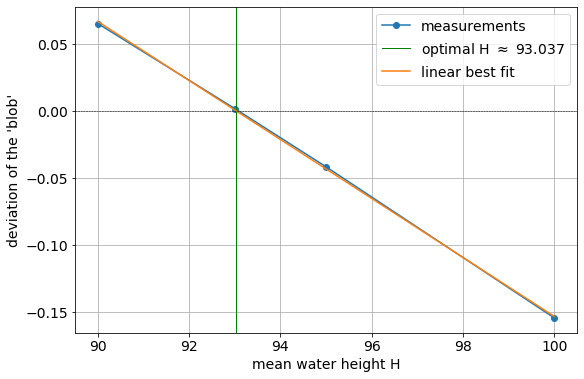

[93.03673529]


In [497]:
# y = [-0.6915855407714844, -0.06304168701171875, -0.00130462646484375, 0.041015625, 0.15082550048828125, 3.5741424560546875]
# x = [50, 90, 93, 95, 100, 200]

y = [0.70944595, 0.06523895, 0.0018615723, -0.04156494, -0.1542511, -3.6651459]
x = [50, 90, 93, 95, 100, 200]

x = x[:-1]
y = y[:-1]
x = x[1:]
y = y[1:]

dx = x[-1] - x[0]
dy = y[-1] - y[0]

xx = np.arange(x[0],x[-1]+1)
b = y[2] - dy/dx * x[2]
# yy = dy/dx * xx + b

xo = -b / (dy/dx)
# print(xo)

z = np.polyfit(x, y, 1)
zz = np.poly1d(z)
root = np.roots(zz)
yy = z[0] * xx + z[1]

a = xo
# print(a)

plt.figure(figsize=(9,6))
plt.plot(x,y, '-o', label='measurements')
plt.xlabel("mean water height H")
plt.ylabel("deviation of the 'blob'")
plt.axvline(root, c='g', lw=1.0, label=r'optimal H $\approx$ %.3f' %root)
plt.plot(xx,yy, label='linear best fit')
plt.axhline(0.0, c='k', ls='--', lw=0.5)
plt.legend()
plt.grid()
plt.show()

print(root)

In [560]:
%%capture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
%matplotlib inline

from IPython.display import HTML

# ref: https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-surface-plot-funcanimation-matplotlib.html
N = 150 # Meshsize
# et = 1E6

Lx, Ly = 1E6, 1E6
x = np.linspace(0,Lx,Nx) / 1000
y = np.linspace(0,Ly,Ny) / 1000

H = 100.0
N = 1

X, Y = np.meshgrid(x, y)

frns = np.arange(0,301) # animation frames
time_series = np.zeros((frns.shape[0],Nx,Ny))

comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

attribute = 'rho'

for ii,fr in enumerate(frns):
    time_series[ii] = tc.get_arr(path, fr, N, attribute, label_type='STEP', inner=True) - H
    
def update_plot(frame_number, time_series, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, time_series[frame_number,:,:], cmap="magma")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

plot = [ax.plot_surface(X, Y, time_series[0,:,:], color='0.75', rstride=1, cstride=1)]
ax.set_zlim(-.5,.5)
ax.set_xlabel(r'$L_x$ [km]')
ax.set_ylabel(r'$L_y$ [km]')
ax.set_zlabel(r'$\delta h$ [m]')
ax.view_init(60, 45)
anim = animation.FuncAnimation(fig, update_plot, frns, fargs=(time_series, plot), interval=100)

In [561]:
HTML(anim.to_html5_video())

0.010000001


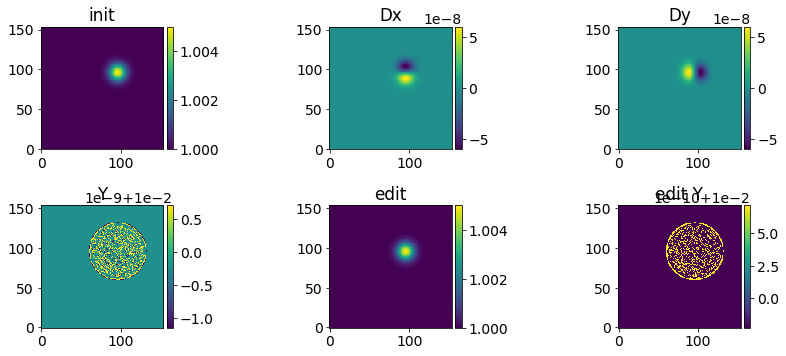

In [80]:
comp_sfx = 'comp'
fn = tc.get_filename(N,comp_sfx)
path = tc.get_path(fn)

init = tc.get_arr(path, 0, N, 'rhoY', label_type='STEP', tag='ic', inner=False, avg=False)[0]
init_rho = tc.get_arr(path, 0, N, 'rho', label_type='STEP', tag='ic', inner=False, avg=False)[0]

dx, dy = np.diff(x)[0], np.diff(y)[0]

Dx = np.gradient(init,dx,axis=0)
Dy = np.gradient(init,dy,axis=1)

# edit = init - (Dx + Dy)

# eDx = np.gradient(edit,dx,axis=0)
# eDy = np.gradient(edit,dy,axis=1)

edit = init_rho / 100.0
# edit -= edit.mean()
# edit += 1.0

arr_lst = [[init, "init"], [Dx,'Dx'], [Dy,'Dy']]
Y = init / init_rho
arr_lst += [[Y, 'Y'], [edit, 'edit'], [edit / init_rho, 'edit Y']]
# arr_lst += [[edit, "edit"], [eDx,'eDx'], [eDy,'eDy']]
pl = pt.plotter(arr_lst,ncols=3)
pl.plot(aspect='equal')


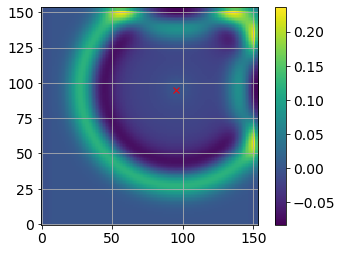

0.0010681152
0.9978649104014039


In [502]:
rhoY = tc.get_arr(path, 100, N, 'rho', label_type='STEP', inner=False, avg=False)[0]

idx = [103,93]
idx = [95,95]

rhoY = rhoY - H

plt.figure()
plt.imshow(rhoY[:,:], origin='lower',aspect='equal')
plt.plot(idx[0],idx[1],'rx')
plt.colorbar()
plt.grid()
plt.show()

print(rhoY[idx[0],idx[1]])
print((1.0 - rhoY[idx[0],idx[1]])**2)

In [504]:
0.16827393 /0.0010681152

157.54286616275098

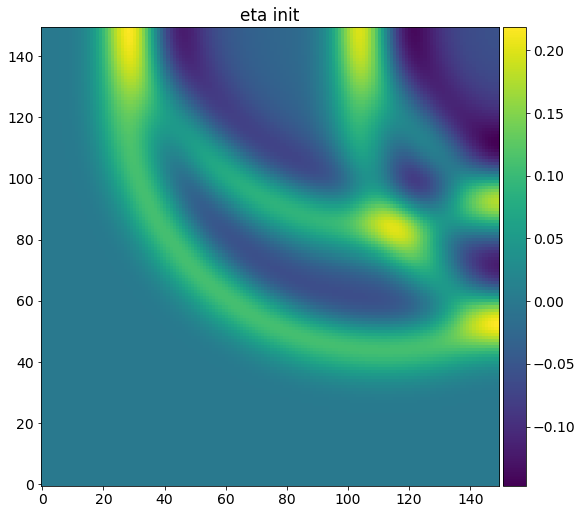

In [145]:
eta = np.load('../output_swe/eta_list.npy')

eta_init = eta[40]
eta_lst = [[eta_init, "eta init"]]
pl = pt.plotter(eta_lst,ncols=1)
pl.plot(aspect='equal')